## **The Data Story of Facebook**

This notebook gives a detailed exploratory data analysis and insights from a  **Facebook dataset** which can be helpful in identifying users that can be focused more to increase the business. These valuable insights can help Facebook to take intelligent decision to identify its useful users and provide correct recommendations to them.

The dataset and problem has been taken from Kaggle's facebook dataset.

https://www.kaggle.com/sheenabatra/facebook-data

My notebook goes on in a story format with each step explained with vizualizations and insights wherever required.

Let us first import all the necessary libraries that we will be using for our analysis. Let us then import the facebook data into the google colab platform.

In [0]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [0]:
from google.colab import files
uploaded = files.upload()

Saving pseudo_facebook.csv to pseudo_facebook.csv


In [0]:
#putting facebook data on a facebook dataframe

facebook = pd.read_csv('pseudo_facebook.csv')

In [0]:
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [0]:
facebook.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [0]:
#checking NA values for different columns
facebook.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

The gender column has 175 missing values and the tenure column has 2 missing values.

Since we don't want any bias in our exploratory data analysis, we will remove the 177 null data as these 177 datapoints are not gonna change our story and trends muych since we already have 100,000 data. Therefore, lets drop the NA values for now.


In [0]:
facebook_updated = facebook.dropna()

For a start, lets plot the distribution of each predictor and gain an overview of the data.

<Figure size 648x576 with 0 Axes>

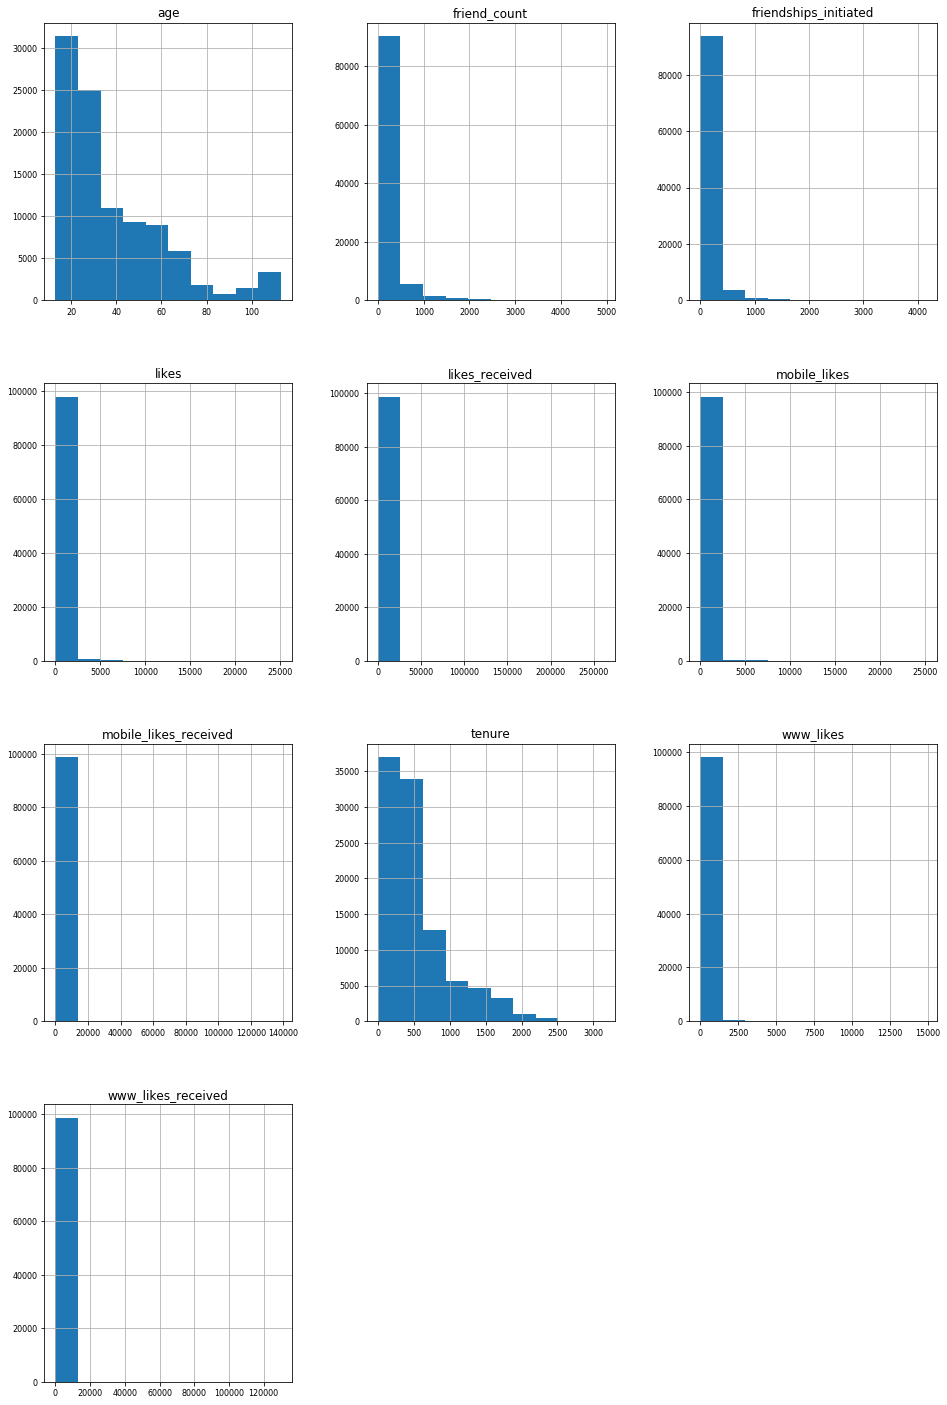

In [0]:
plt.figure(figsize=(9, 8))
facebook_updated[['age',	'gender',	'tenure',	'friend_count',	'friendships_initiated',	'likes',	'likes_received',	'mobile_likes',	'mobile_likes_received',	'www_likes', 'www_likes_received']].hist(figsize=(16, 25), bins=10, xlabelsize=8, ylabelsize=8); 

From the above plots, we have the following intuitions:-

1) In the data we have in hand, most of the people belong to the **age-groups** (0-30) and then it starts decreasing with increase in age. 

2) The **likes**' values ( given or received) are in general right skewed which is obvious. There are few people who are very active in liking or receiving likes, most of the people are in the lower range

3) **Tenure** is also right skewed. Since, this data is from 2013, most of the people in the data have joined facebook in the last 500 days it seems with only few people using it for long time.

4) **Friend_count** and **friendship_initiated** is also right skewed, there are few people who have 1000+ friends or have initiated 1000+ friendships.

Interesting isn't it? Lets delve deeper.


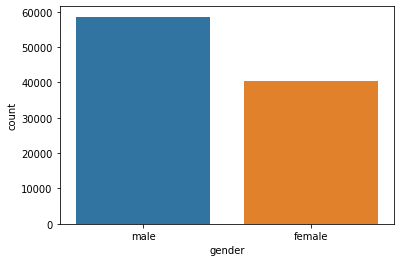

In [0]:
#gender distribution in the data
ax = sns.countplot(x="gender", data=facebook_updated)

In [0]:
print('Percentage of males in the dataset', end = ' ')
print(facebook_updated[facebook_updated['gender']=='male'].shape[0] * 100 /facebook_updated.shape[0], end = '')
print('%')


Percentage of males in the dataset 59.26982777811507%


The dataset has 59.26% of males which means around 40% are females.

Now, since most of the features contain outliers, lets find a upper bound that classifies any data as outliers so that our plots (while exploring ) seem more informative. Because of the outliers, the plots are look very skewed and its difficult to have more intuition for smaller values.

I will just use these upper bounds (boxplot outliers) for visualization purposes.

Upper limit = 75th percentile + 1.5 * Interquartile Range

In [0]:
def find_upper_bound(cols):
  Upp_Bound = ((np.percentile(facebook_updated[cols],75)) + 1.5*np.subtract(*np.percentile(facebook_updated[cols],[75,25])))
  return (Upp_Bound)


In [0]:
print('Upper Bound of Tenure', end = ' ')
print(find_upper_bound('tenure'))

print('Upper Bound of friend_count', end = ' ')
print(find_upper_bound('friend_count'))

print('Upper Bound of likes', end = ' ')
print(find_upper_bound('likes'))

print('Upper Bound of likes_received', end = ' ')
print(find_upper_bound('likes_received'))

print('Upper Bound of friendships_initiated', end = ' ')
print(find_upper_bound('friendships_initiated'))


Upper Bound of Tenure 1343.5
Upper Bound of friend_count 468.5
Upper Bound of likes 201.0
Upper Bound of likes_received 146.0
Upper Bound of friendships_initiated 267.0


Lets start exploring some interesting stories from the Facebook data.


In [0]:
print('Some interesting observations :- ')
a = facebook_updated[(facebook_updated['likes_received']==0) & (facebook_updated['likes']==0)].shape[0]
b = facebook_updated[(facebook_updated['likes_received']<10) & (facebook_updated['likes']<10)].shape[0]
print('About', end=' ')
print(a/1000, end ='')
print('% of the data have neither liked nor received any likes')
print('About', end=' ')
print(b/1000, end ='')
print('% of the data have given or received less than 10 likes')

Some interesting observations :- 
About 15.44% of the data have neither liked nor received any likes
About 40.353% of the data have given or received less than 10 likes


In [0]:
total_males_like = facebook_updated[facebook_updated['gender']=='male']['likes'].sum()/facebook_updated['likes'].sum()
total_males_like_received = facebook_updated[facebook_updated['gender']=='male']['likes_received'].sum()/facebook_updated['likes_received'].sum()
total_friends = facebook_updated[facebook_updated['gender']=='male']['friend_count'].sum()/facebook_updated['friend_count'].sum()
print('Percentage of likes done by all the males  in the dataset', end = ' ')
print(total_males_like, end = '')
print('%')
print('Percentage of likes received by all the males in the dataset', end = ' ')
print(total_males_like_received, end = '')
print('%')
print('Percentage of friend_Counts of all the males in the dataset', end = ' ')
print(total_friends, end = '')
print('%')

Percentage of likes done by all the males males in the dataset 0.32149046069196324%
Percentage of likes received by all the males in the dataset 0.2821360213245513%
Percentage of friend_Counts of all the males in the dataset 0.4981118532312801%


Well, even though the males constitute 60% of the data and have almost similar number of friends as the females, they have given almost half the likes given by the females. When it comes to likes_received they have received about 1/3rd of the likes on facebook.

Observation : Females are more likely to like and receive likes on facebook.



In [0]:
avg_males_like_to_female_like_ratio = facebook_updated[facebook_updated['gender']=='male']['likes'].mean()/facebook_updated[facebook_updated['gender']=='female']['likes'].mean()
avg_males_like_received_to_female_like_ratio = facebook_updated[facebook_updated['gender']=='male']['likes_received'].mean()/facebook_updated[facebook_updated['gender']=='female']['likes_received'].mean()
print('Ratio of likes done by 1 male to 1 female', end = ' ')
print(avg_males_like_to_female_like_ratio, end = '')
print('%')
print('Ratio of likes received by 1 male to 1 female', end = ' ')
print(avg_males_like_received_to_female_like_ratio, end = '')
print('%')

Ratio of likes done by 1 male to 1 female 0.3256077357639807%
Ratio of likes received by 1 male to 1 female 0.2700840622868919%


Observations:

1) For every 1 like that a male does, a female does 3 likes.

2) For every 1 like that a male receives, a female does 3 likes.

Lets just put this story into a plot.

Text(0, 0.5, 'likes')

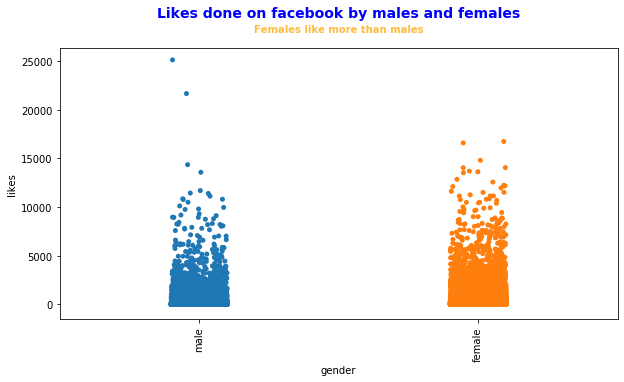

In [0]:
  #Jitter plot to analyse likes by males and females
  plt.figure(figsize=(10, 5))
  ax = sns.stripplot(x="gender", y="likes", jitter = True, data=facebook_updated)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.text(x=0.5, y=1.1, s='Likes done on facebook by males and females', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='Females like more than males', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'orange', transform=ax.transAxes)
  ax.set_xlabel('gender', fontsize = 10)
  ax.set_ylabel('likes', fontsize = 10)

This jitter plots helps us in analysing each and every datapoints. Now, lets draw a boxplot (without the outliers using the upper_bound of likes as 201 as found above.

Text(0, 0.5, 'likes')

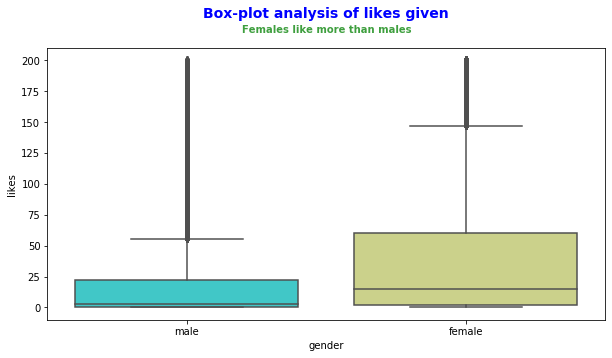

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="gender", y="likes",data=facebook_updated[facebook_updated['likes']<201],palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='Box-plot analysis of likes given', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='Females like more than males', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
  ax.set_xlabel('gender', fontsize = 10)
  ax.set_ylabel('likes', fontsize = 10)

Now, its easier to understand that in general, **females LIKE more than males on facebook.**

Text(0, 0.5, 'likes_received')

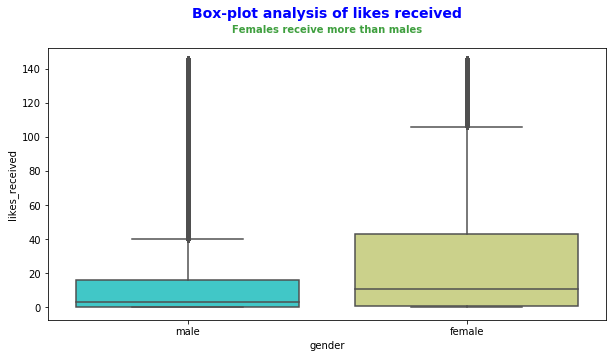

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="gender", y="likes_received",data=facebook_updated[facebook_updated['likes_received']<146],palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='Box-plot analysis of likes received', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='Females receive more than males', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
  ax.set_xlabel('gender', fontsize = 10)
  ax.set_ylabel('likes_received', fontsize = 10)

Additionally, **Females receive more LIKES than Males.**

Now, lets first break our continuous variable 'age' into a categorical variable of different **age-groups** and then proceed towards its analysis.


**New** - 0-17

**Millennial** - 18 - 34

**Gen X** - 35-50

**Boomer** - 51-69

**Silent** - 70+

In [0]:
#Making a agegroup column using above age-groups

facebook_updated['agegroup']=np.nan
facebook_updated.loc[facebook_updated['age']<=17, 'agegroup'] = 'new(0-17)'
facebook_updated.loc[(facebook_updated['age'] > 17) & (facebook_updated['age']<= 34), 'agegroup'] = 'millennial(18-34)'
facebook_updated.loc[(facebook_updated['age'] > 34) & (facebook_updated['age']<= 50), 'agegroup'] = 'genx(35-50)'
facebook_updated.loc[(facebook_updated['age'] > 50) & (facebook_updated['age']<= 69), 'agegroup'] = 'boomer(51-69)'
facebook_updated.loc[facebook_updated['age']>69, 'agegroup'] = 'silent(70+)'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
facebook_updated.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,agegroup
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,new(0-17)
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,new(0-17)
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,new(0-17)
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,new(0-17)
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,new(0-17)


Text(0, 0.5, 'friend_count')

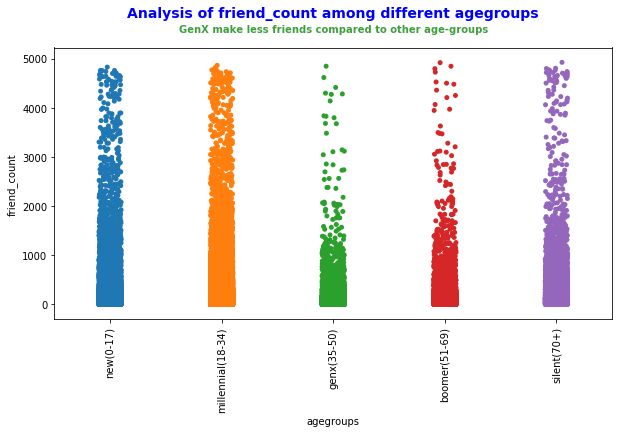

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.stripplot(x="agegroup", y="friend_count", jitter = True, data=facebook_updated)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.text(x=0.5, y=1.1, s='Analysis of friend_count among different agegroups', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='GenX make less friends compared to other age-groups', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
  ax.set_xlabel('agegroups', fontsize = 10)
  ax.set_ylabel('friend_count', fontsize = 10)

Text(0, 0.5, 'friend_count')

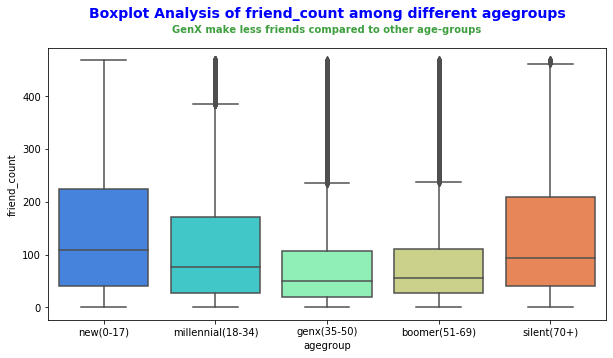

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="agegroup", y="friend_count",data=facebook_updated[facebook_updated['friend_count']<468.5],palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='Boxplot Analysis of friend_count among different agegroups', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='GenX make less friends compared to other age-groups', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
  ax.set_xlabel('agegroup', fontsize = 10)
  ax.set_ylabel('friend_count', fontsize = 10)

Text(0, 0.5, 'friendships_initiated')

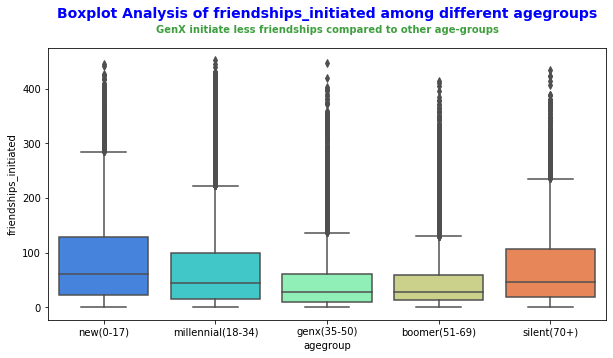

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="agegroup", y="friendships_initiated",data=facebook_updated[facebook_updated['friend_count']<468.5],palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='Boxplot Analysis of friendships_initiated among different agegroups', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='GenX initiate less friendships compared to other age-groups', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
  ax.set_xlabel('agegroup', fontsize = 10)
  ax.set_ylabel('friendships_initiated', fontsize = 10)

**GenX**, that is the age group between 35 and 50 are mostly people who are highly busy with their careers and therefore they are less interested in adding friends on facebook compared to other age-groups. **New** and **Silent** age groups are more acitve in adding new friends on facebook.

Text(0, 0.5, 'Likes')

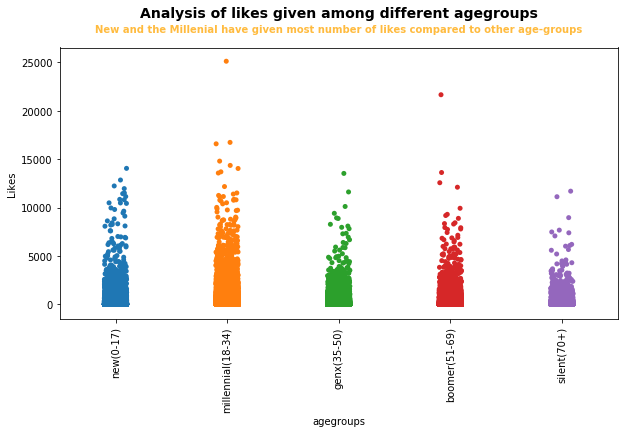

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.stripplot(x="agegroup", y="likes", jitter = True, data=facebook_updated)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.text(x=0.5, y=1.1, s='Analysis of likes given among different agegroups', fontsize=14, weight='bold', ha='center', va='bottom',color = 'black', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='New and the Millenial have given most number of likes compared to other age-groups',color = 'orange', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom', transform=ax.transAxes)
  ax.set_xlabel('agegroups', fontsize = 10)
  ax.set_ylabel('Likes', fontsize = 10)

We can see that **likes** and **friend_counts** have almost similar trends. **Millennial people** are the ones who **give most** of the **likes** which might be because most of these people are in their teenage or college years. They are more involved in making new friends, travelling and meeting new people and searching for new careers.

Text(0, 0.5, 'tenure')

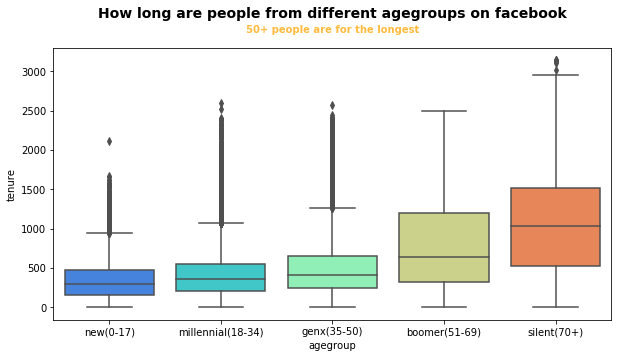

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="agegroup", y="tenure",data=facebook_updated,palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='How long are people from different agegroups on facebook', fontsize=14, weight='bold', ha='center', va='bottom',color = 'black', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='50+ people are for the longest',color = 'orange', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom', transform=ax.transAxes)
  ax.set_xlabel('agegroup', fontsize = 10)
  ax.set_ylabel('tenure', fontsize = 10)

From the above plot, we can see that 50+ people are on facebook for the longest time. The tenure increases with increase in age.

Text(114.0, 0.5, 'Months')

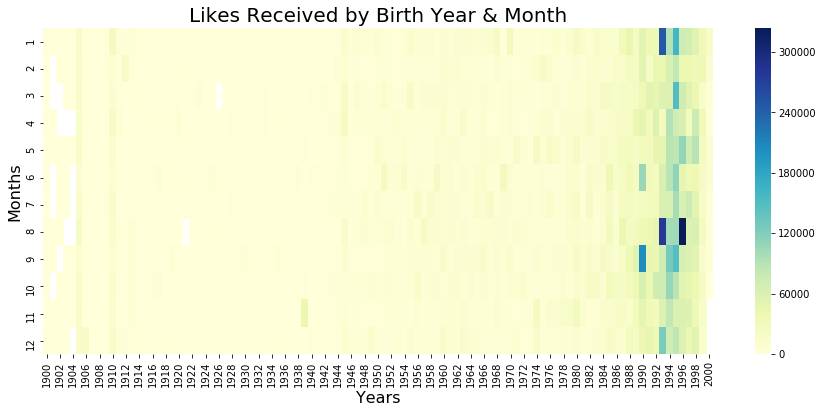

In [0]:
fb_likes = pd.pivot_table(facebook_updated,index='dob_month', columns='dob_year',values= 'likes_received', aggfunc='sum')
fig, ax = plt.subplots(figsize=(15,6)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Likes Received by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

There is a funny observation in the above heatmap. People born in **January** and **August** are the ones to receive most number of likes. Seems like people who belong to the 'Leo' and 'Capricorn group are lucky. Lol. Jokes apart. Lets move forward.

Now, lets analyze the **engagements** on **facebook** which can in turn be useful for facebook to get an idea of whom to target and how to increase their engagement whicch in turn leads to the increase in revenue.

Before analyzing the people with least engagements, lets get an idea of the top 100 people who are giving the most number of likes.

In [0]:
#top 100 people based on likes
df_top100_likes = facebook_updated.nlargest(100,'likes')


Text(0, 0.5, 'likes')

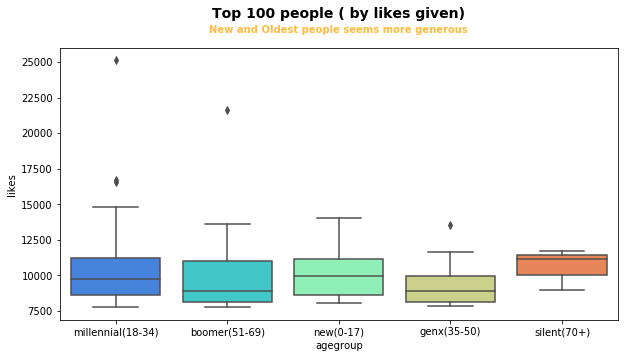

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="agegroup", y="likes",data=df_top100_likes,palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='Top 100 people ( by likes given)', fontsize=14, weight='bold', ha='center', va='bottom',color = 'black', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='New and Oldest people seems more generous',color = 'orange', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom', transform=ax.transAxes)
  ax.set_xlabel('agegroup', fontsize = 10)
  ax.set_ylabel('likes', fontsize = 10)

Text(0, 0.5, 'likes')

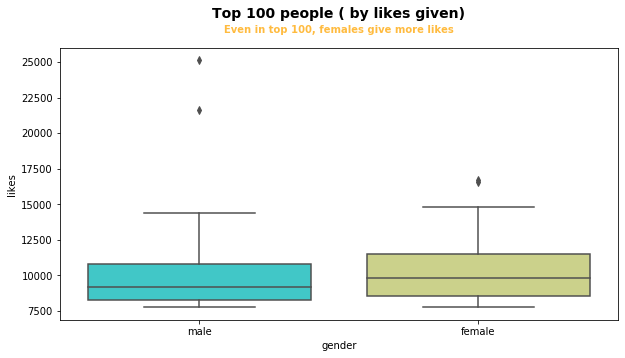

In [0]:
  plt.figure(figsize=(10, 5))
  ax = sns.boxplot(x="gender", y="likes",data=df_top100_likes,palette='rainbow')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  ax.text(x=0.5, y=1.1, s='Top 100 people ( by likes given)', fontsize=14, weight='bold', ha='center', va='bottom',color = 'black', transform=ax.transAxes)
  ax.text(x=0.5, y=1.05, s='Even in top 100, females give more likes',color = 'orange', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom', transform=ax.transAxes)
  ax.set_xlabel('gender', fontsize = 10)
  ax.set_ylabel('likes', fontsize = 10)

We can see from the above 2 plots that among the top 100 profiles by likes, the age groups of **New** ( 0-17 ) and **Silent** (70+ ) are **giving out most number of likes** compared to other age-groups.


Now, lets analyze the the people with **no engagements**, that is the people who have neither given nor received any likes based on when they have joined.

In [0]:
df_tenure_under_one_year = facebook_updated  [facebook_updated['tenure']<=365]
df_tenure_one_or_more = facebook_updated  [facebook_updated['tenure']>365]
print('Agegroup distribution of people who joined facebook over the last year')
print(df_tenure_under_one_year.agegroup.value_counts())
print('\n')
print('Agegroup distribution of people who joined facebook before a year')
print(df_tenure_one_or_more.agegroup.value_counts())

Agegroup distribution of people who joined facebook over the last year
millennial(18-34)    24411
new(0-17)             6858
genx(35-50)           6431
boomer(51-69)         4459
silent(70+)           1483
Name: agegroup, dtype: int64


Agegroup distribution of people who joined facebook before a year
millennial(18-34)    23968
boomer(51-69)        11297
genx(35-50)           8627
silent(70+)           6757
new(0-17)             4535
Name: agegroup, dtype: int64


In [0]:
df_no_engagement_tenure_under_one_year = facebook_updated  [(facebook_updated['likes']==0 )  & (facebook_updated['likes_received']==0)  & (facebook_updated['tenure']<=365)]
df_no_engagement_tenure_one_or_more = facebook_updated  [(facebook_updated['likes']==0 )  & (facebook_updated['likes_received']==0)  & (facebook_updated['tenure']>365)]


In [0]:
print(df_no_engagement_tenure_under_one_year.shape)
print('\n')
print('Agegroup distribution of people who joined facebook over the last year and have no engagements')
print(df_no_engagement_tenure_under_one_year.agegroup.value_counts())

(8173, 16)


Agegroup distribution of people who joined facebook over the last year and have no engagements
millennial(18-34)    4791
genx(35-50)          1284
new(0-17)            1205
boomer(51-69)         709
silent(70+)           184
Name: agegroup, dtype: int64


In [0]:
print(df_no_engagement_tenure_one_or_more.shape)
print('\n')
print('Agegroup distribution of people who joined facebook before a year and have no engagements')
print(df_no_engagement_tenure_one_or_more.agegroup.value_counts())

(7267, 16)


Agegroup distribution of people who joined facebook before a year and have no engagements
millennial(18-34)    3613
genx(35-50)          1329
boomer(51-69)        1316
silent(70+)           554
new(0-17)             455
Name: agegroup, dtype: int64


In [0]:
print('Percentage of people across agegroups who have joined in the last 365 days and have no engagements')
df1 = pd.DataFrame({'total_tenure_under_one_year':df_tenure_under_one_year.agegroup.value_counts(), 'no_engagement':df_no_engagement_tenure_under_one_year.agegroup.value_counts()})
df1['percentage_no_engagement'] = 100*df1['no_engagement']/df1['total_tenure_under_one_year']
df1

Percentage of people across agegroups who have joined in the last 365 days and have no engagements


,total_tenure_under_one_year,no_engagement,percentage_no_engagement
boomer(51-69),4459,709,15.900426
genx(35-50),6431,1284,19.965791
millennial(18-34),24411,4791,19.626398
new(0-17),6858,1205,17.570720
silent(70+),1483,184,12.407283


In [0]:
print('Percentage of people across agegroups who have joined before a year and have no engagements')
df2 = pd.DataFrame({'total_tenure_one_year_plus':df_tenure_one_or_more.agegroup.value_counts(), 'no_engagement':df_no_engagement_tenure_one_or_more.agegroup.value_counts()})
df2['percentage_no_engagement'] = 100*df2['no_engagement']/df2['total_tenure_one_year_plus']
df2

Percentage of people across agegroups who have joined before a year and have no engagements


,total_tenure_one_year_plus,no_engagement,percentage_no_engagement
boomer(51-69),11297,1316,11.649110
genx(35-50),8627,1329,15.405123
millennial(18-34),23968,3613,15.074266
new(0-17),4535,455,10.033076
silent(70+),6757,554,8.198905


From the above two tables, we can see that **GenX** and **Millennial** are the ones with highest percentage of people having no engagements.

This might also be due to the reason that most number of people on facebook already belong to these age groups leading to a high percentage of no_engagements. This is constant whether they joined facebook over the last year or before.

This data can also help facebook to identify spam profiles and analyze with the help of more data like locations, other activities etc to find the reasons for **no_engagements** and then it can in turn leverage these data to personalise the experience of the users.


Finally, lets try to fit a **random forest regressor** to predict the number of likes based on the variables age, gender, tenure, friend_count, friendships_initiated and likes_received. It will give us an intuition on how useful these predictors are to predict '**number of facebook likes**'

In [0]:
#selecting columns for random forest regressor

cols_model = ['age', 'gender', 'tenure', 'friend_count', 'friendships_initiated' , 'likes_received']
X = pd.DataFrame(facebook_updated, columns = cols_model )
y = facebook_updated['likes']
onehotencoder = OneHotEncoder()
one_hot = pd.get_dummies(X['gender'])
X = X.drop(columns = ['gender']).join(one_hot)



#splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X,y,random_state=100,shuffle = True)

#fitting randomforestregressor using gridsearchcv for hyperparameter tuning
clf = RandomForestRegressor()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50],
              "max_features": [1, 3],
              
              }

# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='r2')

grid.fit(X_train, y_train)
print("Grid-Search with r2")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (MSE)): {:.3f}".format(grid.best_score_))

Grid-Search with r2
Best parameters: {'max_features': 3, 'n_estimators': 50}
Best cross-validation score (MSE)): 0.518


In [0]:
grid.best_estimator_.feature_importances_

array([0.07526357, 0.09134118, 0.13750218, 0.10302241, 0.57200111,
       0.00957064, 0.01129891])

We can see that the **r2 score** of 0.518 is 'low'. This means the predictor variables we have chosen only explains **51.8%  of variance in the given data**. Moreover, looking at the individual feature importance of the predictor variables we can see that **likes_received** explained the largest variance to predict likes which is obvious. People who like more receive more likes. 

So, if we would have removed the likes_received parameter and tried to predict likes, the r2 score would be even less. 

This means likes depends on other factors apart from the variables we have in our data. Other factors can be how active a person is on facebook to receive likes, display picture, location, etc.

Thank you for reading.